<a href="https://colab.research.google.com/github/tejasprasadd/British-Airways-Analytics/blob/main/Customer_Buy_Behaviour.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [ ]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [ ]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [ ]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5])

In [ ]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

In [3]:
pip install chardet matplotlib

In [6]:
import pandas as pd
import chardet

file_path = '/content/customer_booking.csv'

# 1. Try common encodings first
encodings_to_try = ['utf-8', 'latin1', 'cp1252', 'utf-16', 'utf-16le', 'utf-16be', 'iso-8859-1']

for encoding in encodings_to_try:
    try:
        data = pd.read_csv(file_path, encoding=encoding)
        print(f"Successfully loaded with encoding: {encoding}")
        # Data processing here
        dataset_info = {
            "shape": data.shape,
            "columns": data.columns.tolist(),
            "missing_values": data.isnull().sum().to_dict(),
            "sample": data.head(),
            "statistics": data.describe()
        }
        print(dataset_info)
        break  # Exit the loop if successful
    except UnicodeDecodeError:
        print(f"Failed to load with encoding: {encoding}")
    except Exception as e:  # Catch other potential errors
        print(f"An error occurred with encoding {encoding}: {e}")

else:  # 2. If common encodings fail, try chardet
    try:
        with open(file_path, 'rb') as f:  # Open in binary mode
            result = chardet.detect(f.read())

        encoding = result['encoding']
        confidence = result['confidence']

        print(f"Detected encoding: {encoding} with confidence: {confidence}")

        if confidence > 0.8:  # Set a confidence threshold
            try:
                data = pd.read_csv(file_path, encoding=encoding)
                print(f"Successfully loaded with detected encoding: {encoding}")
                # Data processing here
                dataset_info = {
                    "shape": data.shape,
                    "columns": data.columns.tolist(),
                    "missing_values": data.isnull().sum().to_dict(),
                    "sample": data.head(),
                    "statistics": data.describe()
                }
                print(dataset_info)
            except Exception as e:
                print(f"Error loading with detected encoding: {e}")
        else:
            print("Low confidence in detected encoding. Manual inspection recommended.")

    except Exception as e:
        print(f"Error during encoding detection: {e}")

# 3. If all else fails, provide guidance


Failed to load with encoding: utf-8
Successfully loaded with encoding: latin1
{'shape': (50000, 14), 'columns': ['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead', 'length_of_stay', 'flight_hour', 'flight_day', 'route', 'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals', 'flight_duration', 'booking_complete'], 'missing_values': {'num_passengers': 0, 'sales_channel': 0, 'trip_type': 0, 'purchase_lead': 0, 'length_of_stay': 0, 'flight_hour': 0, 'flight_day': 0, 'route': 0, 'booking_origin': 0, 'wants_extra_baggage': 0, 'wants_preferred_seat': 0, 'wants_in_flight_meals': 0, 'flight_duration': 0, 'booking_complete': 0}, 'sample':    num_passengers sales_channel  trip_type  purchase_lead  length_of_stay  \
0               2      Internet  RoundTrip            262              19   
1               1      Internet  RoundTrip            112              20   
2               2      Internet  RoundTrip            243              22   
3     

**Dataset Preparation**

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

data=pd.read_csv("/content/customer_booking.csv", encoding="ISO-8859-1")

# Copy dataset to avoid accidental overwriting
df = data.copy()

# Encode categorical columns
categorical_columns = ['sales_channel', 'trip_type', 'flight_day', 'route', 'booking_origin']
label_encoders = {col: LabelEncoder() for col in categorical_columns}

for col in categorical_columns:
    df[col] = label_encoders[col].fit_transform(df[col])

# Separate features and target
X = df.drop(columns=['booking_complete'])
y = df['booking_complete']

# Normalize numerical features
numerical_columns = ['purchase_lead', 'length_of_stay', 'flight_hour', 'flight_duration', 'num_passengers']
scaler = StandardScaler()
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# --- Create new DataFrames ---

# 1. Training DataFrame
df_train = pd.concat([X_train, y_train], axis=1)  # Combine X_train and y_train
# Reset index if needed: df_train = df_train.reset_index(drop=True)

# 2. Testing DataFrame
df_test = pd.concat([X_test, y_test], axis=1)  # Combine X_test and y_test
# Reset index if needed: df_test = df_test.reset_index(drop=True)


# Output basic information about the prepared dataset
prepared_data_info = {
    "X_train_shape": X_train.shape,
    "X_test_shape": X_test.shape,
    "y_train_distribution": y_train.value_counts(normalize=True).to_dict(),
    "y_test_distribution": y_test.value_counts(normalize=True).to_dict(),
    "df_train_shape": df_train.shape,  # Add shape of the new training DataFrame
    "df_test_shape": df_test.shape      # Add shape of the new testing DataFrame
}
print(prepared_data_info)

# Now you can work with df_train and df_test
print("\nTraining DataFrame:")
print(df_train.head())

print("\nTesting DataFrame:")
print(df_test.head())


# --- Example of saving to CSV ---
# df_train.to_csv("df_train.csv", index=False)
# df_test.to_csv("df_test.csv", index=False)

{'X_train_shape': (40000, 13), 'X_test_shape': (10000, 13), 'y_train_distribution': {0: 0.85045, 1: 0.14955}, 'y_test_distribution': {0: 0.8504, 1: 0.1496}, 'df_train_shape': (40000, 14), 'df_test_shape': (10000, 14)}

Training DataFrame:
       num_passengers  sales_channel  trip_type  purchase_lead  \
11179        0.400684              1          2       0.918287   
26739       -0.579559              0          2      -0.342071   
16263       -0.579559              0          2       1.504243   
8082        -0.579559              0          2      -0.286792   
39980        4.321659              0          2      -0.397350   

       length_of_stay  flight_hour  flight_day  route  booking_origin  \
11179        0.441328    -0.197010           5    320               4   
26739       -0.591506    -1.490288           2    102              85   
16263       -0.178372    -1.675042           3    519              51   
8082         0.382309    -1.490288           6    251               4   

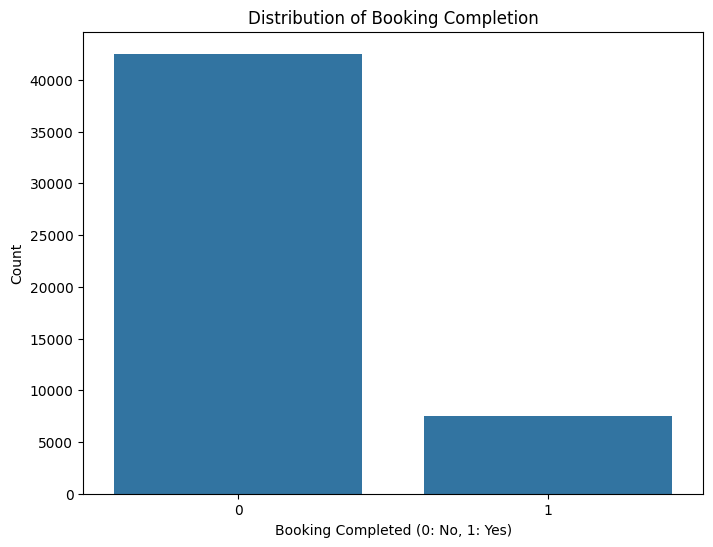

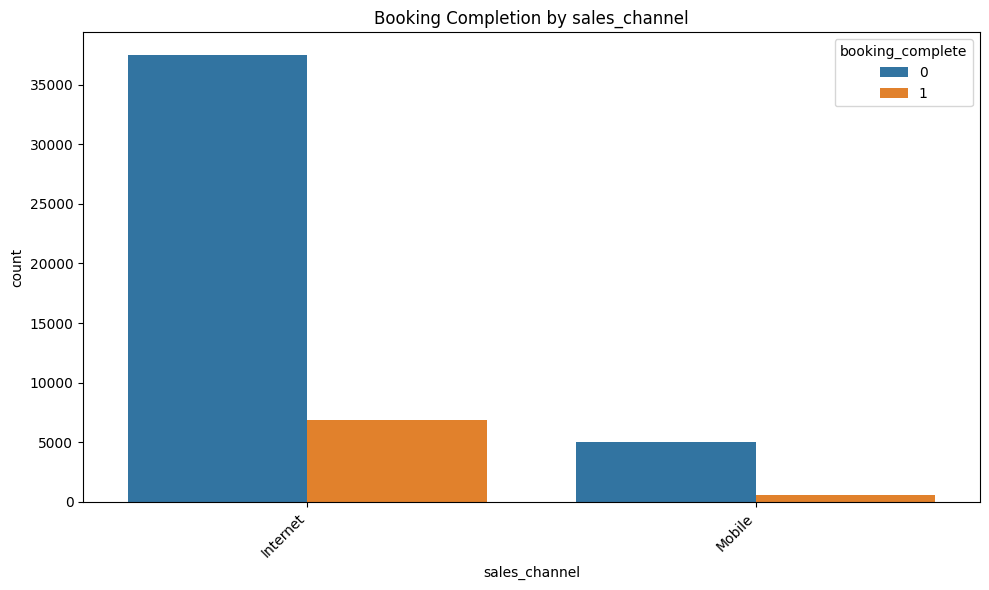

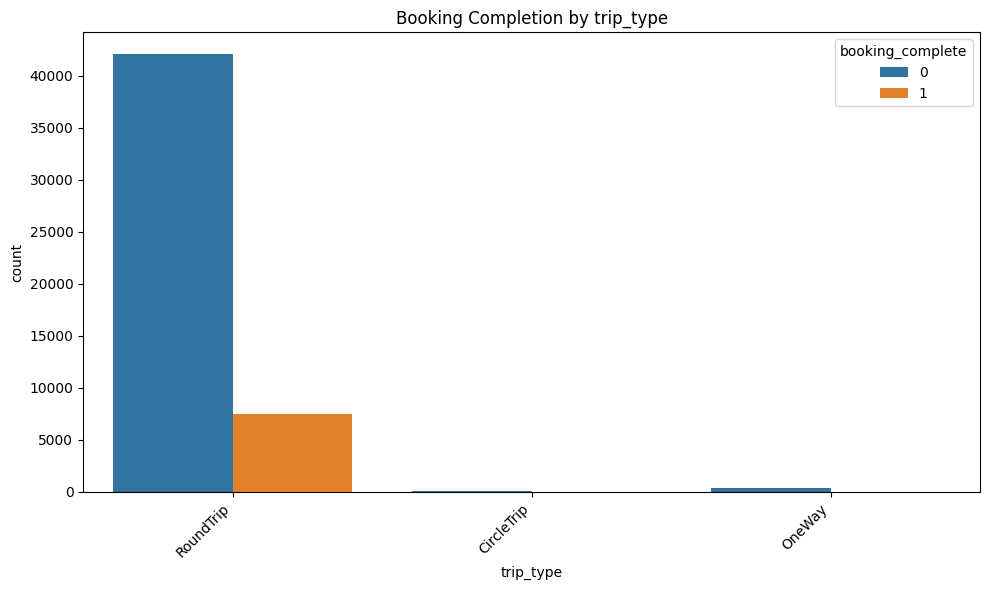

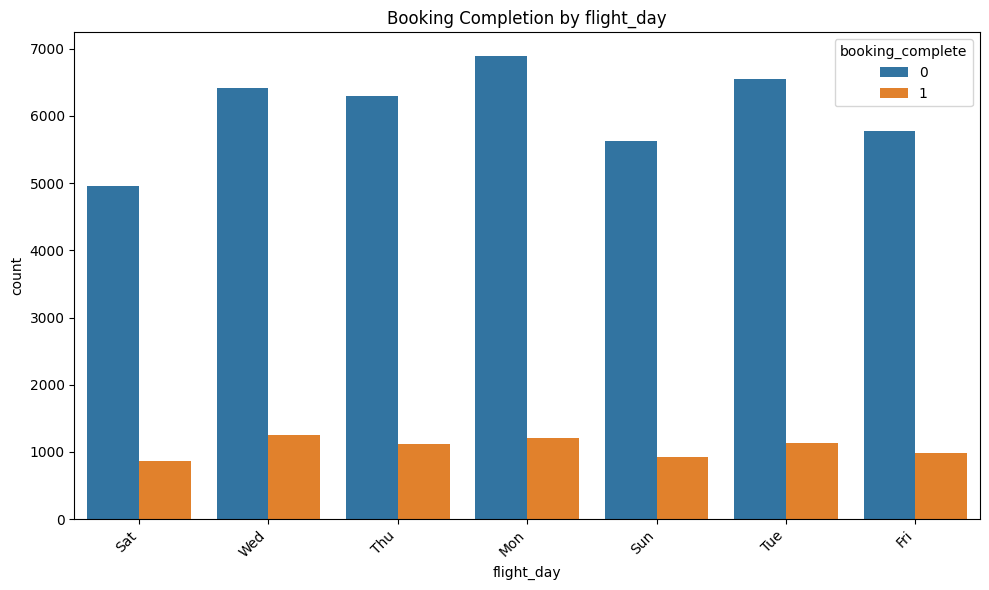

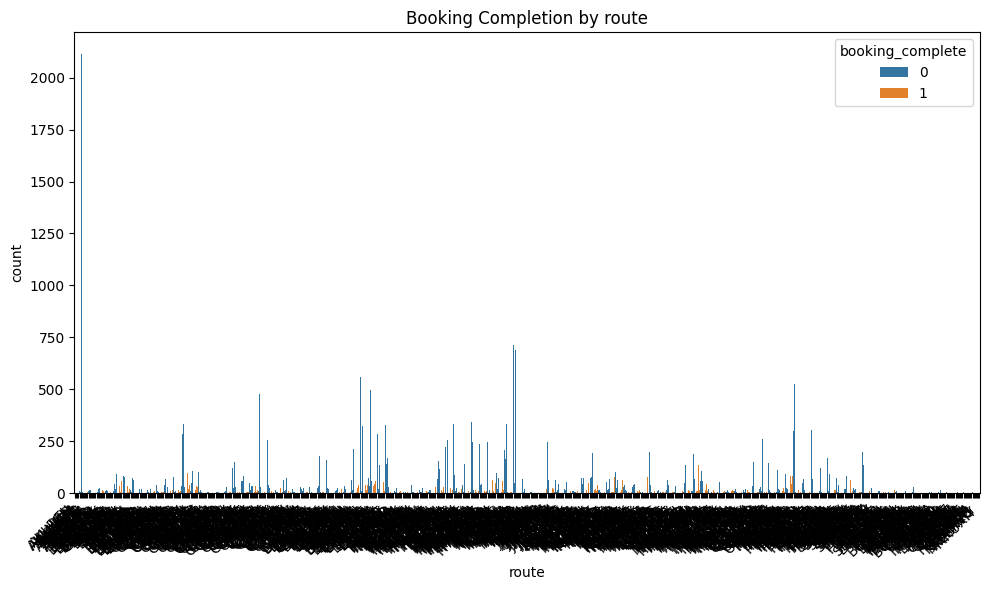

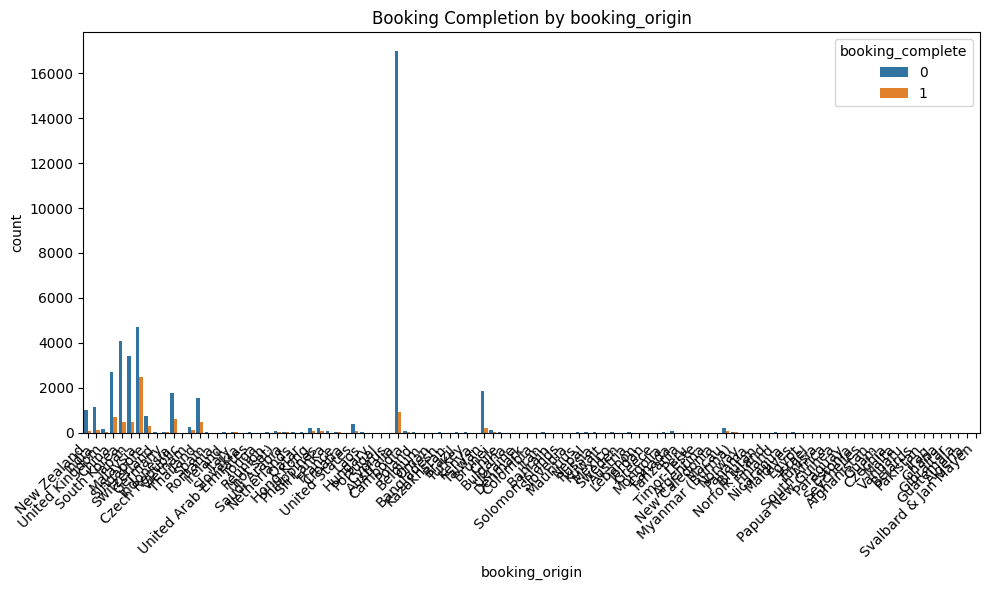

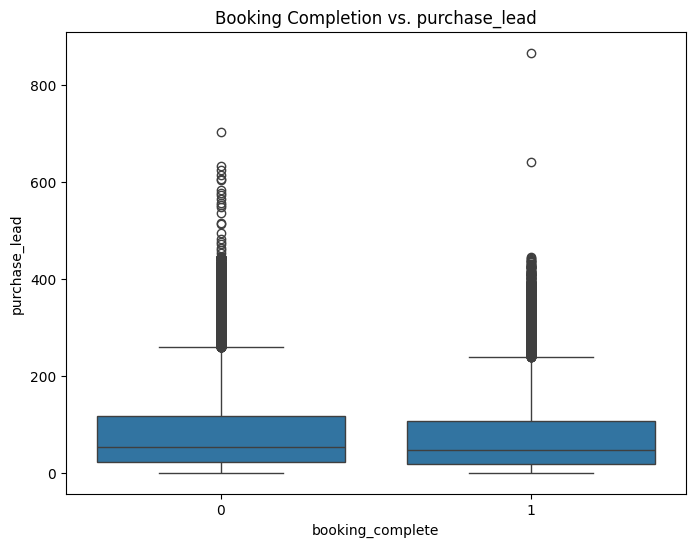

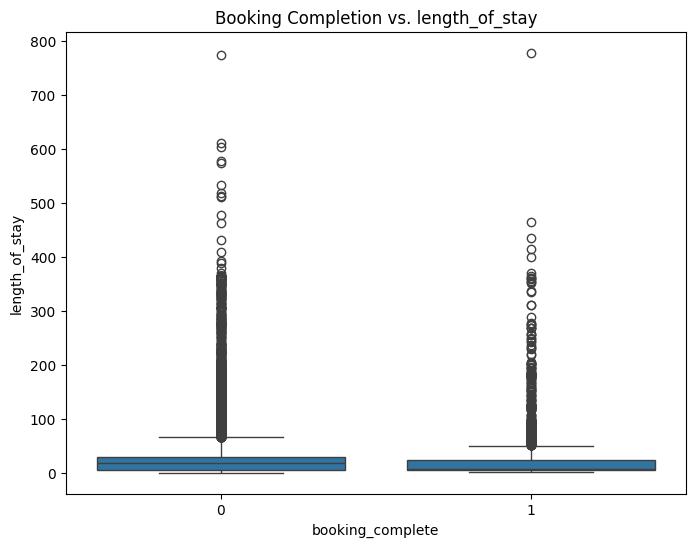

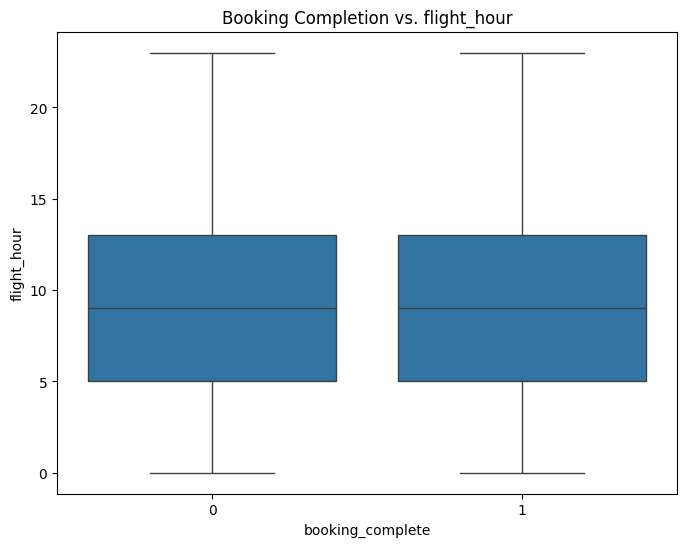

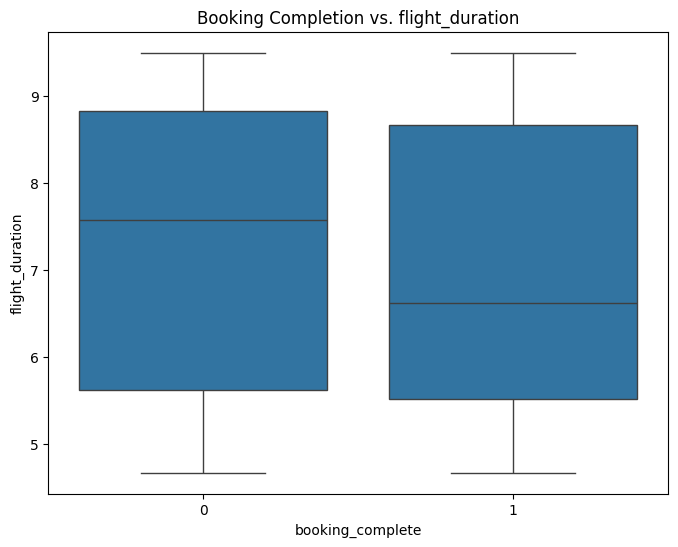

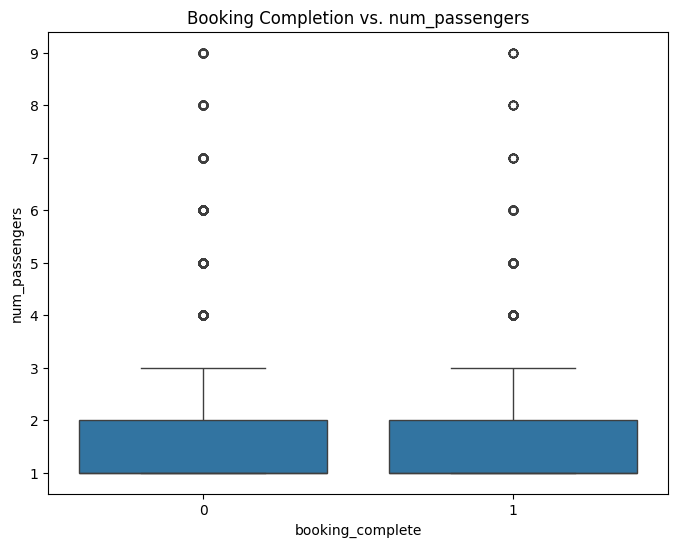

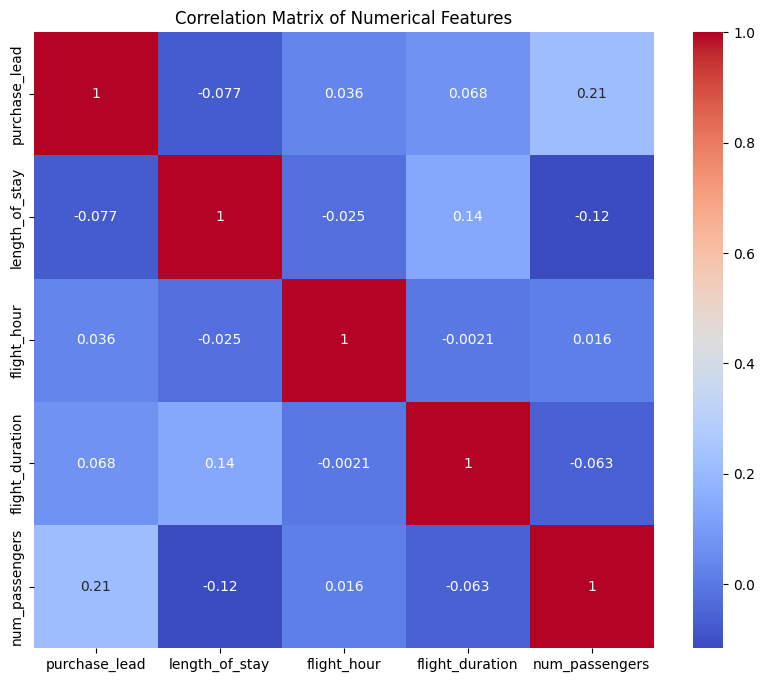

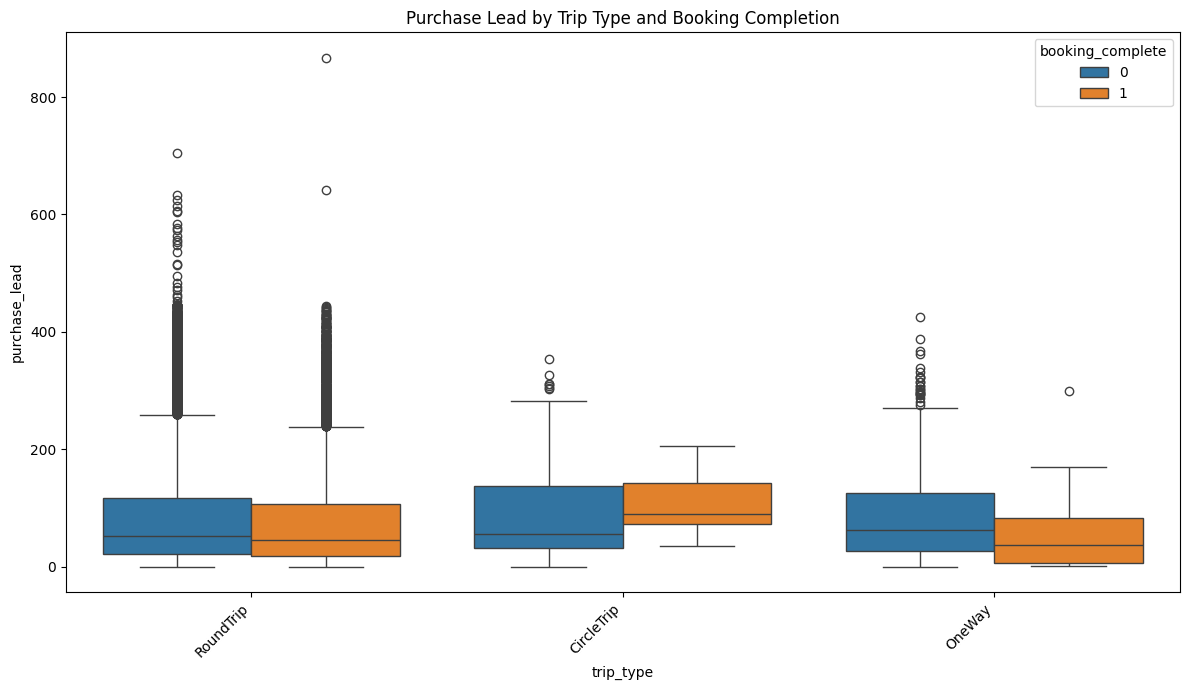

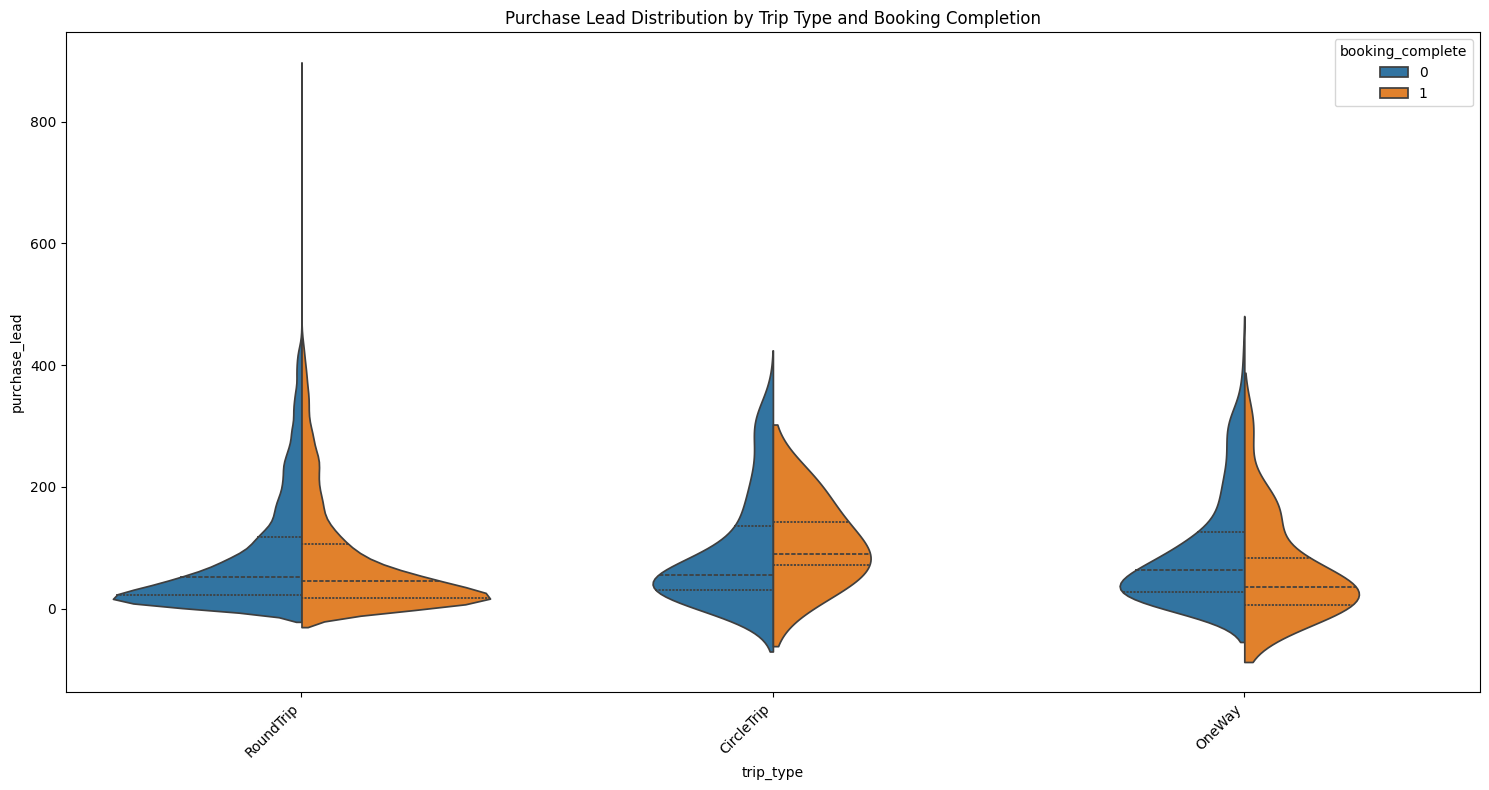

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_customer_behavior(df):
    """Analyzes customer buy behavior visually.

    Args:
        df (pd.DataFrame): The preprocessed Pandas DataFrame.
    """

    # --- Visual Analysis ---

    # 1. Distribution of Target Variable
    plt.figure(figsize=(8, 6))
    sns.countplot(x='booking_complete', data=df)
    plt.title('Distribution of Booking Completion')
    plt.xlabel('Booking Completed (0: No, 1: Yes)')
    plt.ylabel('Count')
    plt.show()

    # 2. Relationship between Categorical Features and Booking Completion
    categorical_columns = ['sales_channel', 'trip_type', 'flight_day', 'route', 'booking_origin']
    for col in categorical_columns:
        plt.figure(figsize=(10, 6))
        sns.countplot(x=col, hue='booking_complete', data=df)
        plt.title(f'Booking Completion by {col}')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

    # 3. Relationship between Numerical Features and Booking Completion
    numerical_columns = ['purchase_lead', 'length_of_stay', 'flight_hour', 'flight_duration', 'num_passengers']
    for col in numerical_columns:
        plt.figure(figsize=(8, 6))
        sns.boxplot(x='booking_complete', y=col, data=df)
        plt.title(f'Booking Completion vs. {col}')
        plt.show()

    # 4. Correlation Matrix for Numerical Features
    plt.figure(figsize=(10, 8))
    sns.heatmap(df[numerical_columns].corr(), annot=True, cmap='coolwarm')
    plt.title('Correlation Matrix of Numerical Features')
    plt.show()

    # 5. Combined Analysis (Example: Purchase Lead by Trip Type and Booking Completion)
    plt.figure(figsize=(12, 7))
    sns.boxplot(x='trip_type', y='purchase_lead', hue='booking_complete', data=df)
    plt.title('Purchase Lead by Trip Type and Booking Completion')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    # Example of a more advanced combined plot (you can adapt this):
    plt.figure(figsize=(15, 8))  # Adjust size as needed
    sns.violinplot(x='trip_type', y='purchase_lead', hue='booking_complete', data=df, split=True, inner="quart")  # Violin plot
    plt.title('Purchase Lead Distribution by Trip Type and Booking Completion')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


if __name__ == "__main__":
    # Load the *preprocessed* data.  The recommended approach is to load from a saved file:
    # try:
    #     df = pd.read_csv('your_preprocessed_data.csv')  # Replace with your saved file path
    # except FileNotFoundError:
    #     print("Preprocessed data file 'your_preprocessed_data.csv' not found. Run data_preparation.py first to create this file.")
    #     exit()
    # except Exception as e:
    #     print(f"Error reading preprocessed data file: {e}")
    #     exit()

    analyze_customer_behavior(data)

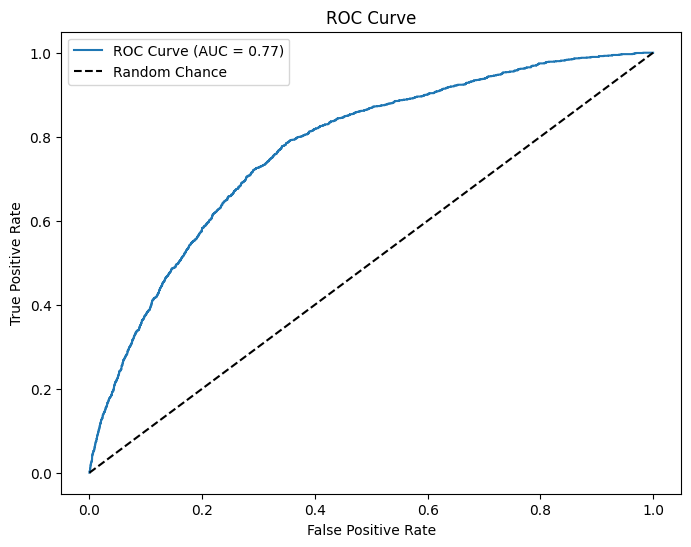

{'classification_report': {'0': {'precision': 0.8509466092357006,
   'recall': 0.9989416745061148,
   'f1-score': 0.9190241791529182,
   'support': 8504.0},
  '1': {'precision': 0.47058823529411764,
   'recall': 0.0053475935828877,
   'f1-score': 0.010575016523463317,
   'support': 1496.0},
  'accuracy': 0.8503,
  'macro avg': {'precision': 0.6607674222649091,
   'recall': 0.5021446340445013,
   'f1-score': 0.46479959783819075,
   'support': 10000.0},
  'weighted avg': {'precision': 0.7940449964940398,
   'recall': 0.8503,
   'f1-score': 0.7831201844235517,
   'support': 10000.0}},
 'roc_auc_score': 0.7725513960715562}

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Train RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

# Evaluate the model
classification_rep = classification_report(y_test, y_pred, output_dict=True)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Prepare results
model_evaluation = {
    "classification_report": classification_rep,
    "roc_auc_score": roc_auc
}

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Chance")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

model_evaluation
